In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [2]:
# Load the full data
train_data = pd.read_csv("group_37.csv")
test_data = pd.read_csv("arcene_test (for groups 32-38).csv")
same_features = train_data.columns[1:]
test_data = test_data[["Class"] + list(same_features)]

In [3]:
# Divide features and target variable
X_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values
X_test = test_data.iloc[:, 1:].values
y_test  = test_data.iloc[:, 0].values

In [4]:
# Standardize features
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [5]:
# Fit svm model
svm_model = SVC(probability = True)
svm_model.fit(X_train, y_train)
# Accuracy
print(svm_model.score(X_test, y_test))
# AUC score
y_proba = svm_model.predict_proba(X_test)[:, 1]
print(roc_auc_score(y_test, y_proba))

0.75
0.8713474025974026


In [6]:
# Hyperparameter of grid search 
params = {
    "kernel": ("linear", "rbf", "poly"),
    "C" : [ 0.01, 0.1, 0.5, 1, 2, 10, 100],
    "gamma": ["scale", "auto", 0.01, 0.1, 1]
}

# Grid search and print the best parameters
svm_model = SVC(probability = True)
gridsearch = GridSearchCV(svm_model, params, scoring = "roc_auc")
gridsearch.fit(X_train, y_train)
print(gridsearch.best_params_)
print(gridsearch.best_score_)

# Use the best model
svm_best = gridsearch.best_estimator_
print(svm_best.score(X_test, y_test))
y_proba = svm_best.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test, y_proba))

{'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
0.9676767676767677
0.84
0.9301948051948051


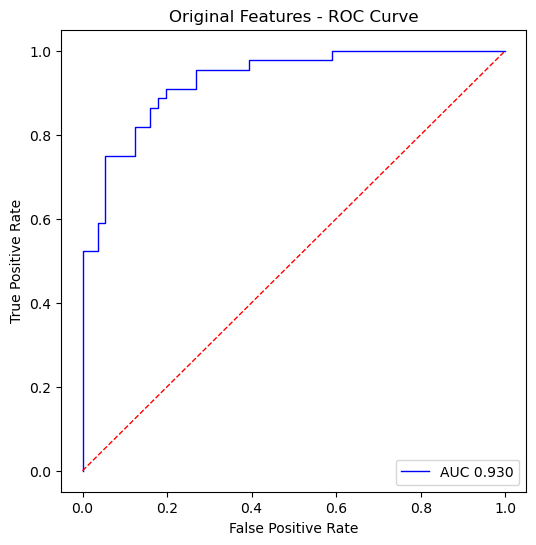

In [7]:
# Plot the ROC
fpr1, tpr1, _ = roc_curve(y_test, y_proba)
roc_auc1 = auc(fpr1, tpr1)
plt.figure(figsize = (6,6))
plt.plot(fpr1, tpr1, color = "blue", lw = 1, label = "AUC {:.3f}".format(roc_auc1))
plt.plot([0,1], [0,1], color = "red", linestyle = "--", lw = 1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Original Features - ROC Curve")
plt.legend(loc = "lower right")

In [8]:
# Load the filtered data 
train_data = pd.read_csv("traindata3.csv")
test_data = pd.read_csv("testdata3.csv")
# Divide features and target variable
X_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values
X_test = test_data.iloc[:, :-1].values
y_test  = test_data.iloc[:, -1].values
# Standardize features
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [9]:
# Fit svm model
svm_model = SVC(C = 1, probability = True)
svm_model.fit(X_train, y_train)
print(svm_model.score(X_test, y_test))
y_proba = svm_model.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test, y_proba))

0.78
0.9017857142857143


In [10]:
# Hyperparameter of grid search 
params = {
    "kernel": ("linear", "rbf", "poly"),
    "C" : [ 0.01, 0.1, 0.5, 1, 2, 10, 100],
    "gamma": ["scale", "auto", 0.01, 0.1, 1]
}

# Grid search and print the best parameters
svm_model = SVC(probability = True)
gridsearch = GridSearchCV(svm_model, params, scoring = "roc_auc")
gridsearch.fit(X_train, y_train)
print(gridsearch.best_params_)
print(gridsearch.best_score_)

# Use the best model
svm_best = gridsearch.best_estimator_
print(svm_best.score(X_test, y_test))
y_proba = svm_best.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test, y_proba))

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.9595959595959596
0.88
0.9484577922077922


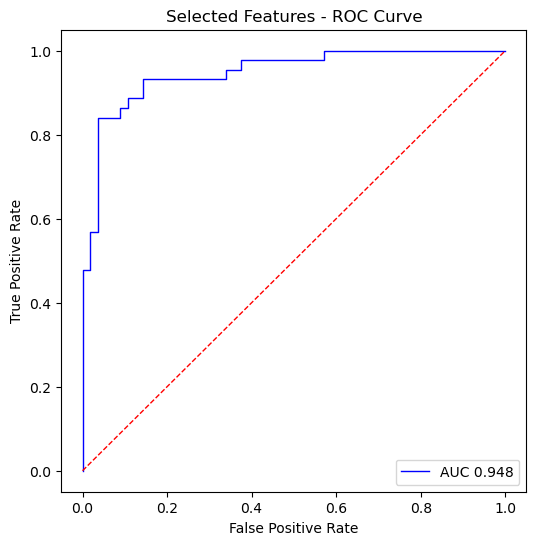

In [11]:
# Plot the ROCs
fpr2, tpr2, _ = roc_curve(y_test, y_proba)
roc_auc2 = auc(fpr2, tpr2)
plt.figure(figsize = (6,6))
plt.plot(fpr2, tpr2, color = "blue", lw = 1, label = "AUC {:.3f}".format(roc_auc2))
plt.plot([0,1], [0,1], color = "red", linestyle = "--", lw = 1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Selected Features - ROC Curve")
plt.legend(loc = "lower right")

In [12]:
# Load the filtered data 
train_data = pd.read_csv("traindata.csv")
test_data = pd.read_csv("testdata.csv")
# Divide features and target variable
X_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values
X_test = test_data.iloc[:, :-1].values
y_test  = test_data.iloc[:, -1].values
# Standardize features
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [13]:
# Fit svm model
svm_model = SVC(C = 1, probability = True)
svm_model.fit(X_train, y_train)
print(svm_model.score(X_test, y_test))
y_proba = svm_model.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test, y_proba))

0.81
0.9257305194805194


In [14]:
# Hyperparameter of grid search 
params = {
    "kernel": ("linear", "rbf", "poly"),
    "C" : [ 0.01, 0.1, 0.5, 1, 2, 10, 100],
    "gamma": ["scale", "auto", 0.01, 0.1, 1]
}

# Grid search and print the best parameters
svm_model = SVC(probability = True)
gridsearch = GridSearchCV(svm_model, params, scoring = "roc_auc", cv =4)
gridsearch.fit(X_train, y_train)
print(gridsearch.best_params_)
print(gridsearch.best_score_)

# Use the best model
svm_best = gridsearch.best_estimator_
print(svm_best.score(X_test, y_test))
y_proba = svm_best.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test, y_proba))

{'C': 2, 'gamma': 'scale', 'kernel': 'rbf'}
0.8912337662337662
0.81
0.9237012987012987


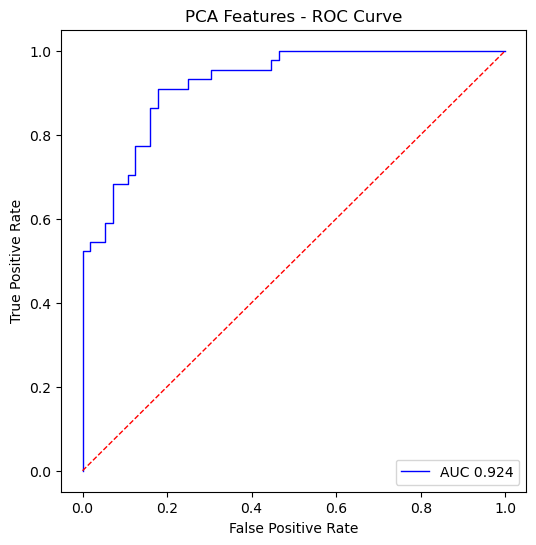

In [15]:
# Plot the ROCs
fpr3, tpr3, _ = roc_curve(y_test, y_proba)
roc_auc3 = auc(fpr3, tpr3)
plt.figure(figsize = (6,6))
plt.plot(fpr3, tpr3, color = "blue", lw = 1, label = "AUC {:.3f}".format(roc_auc3))
plt.plot([0,1], [0,1], color = "red", linestyle = "--", lw = 1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("PCA Features - ROC Curve")
plt.legend(loc = "lower right")

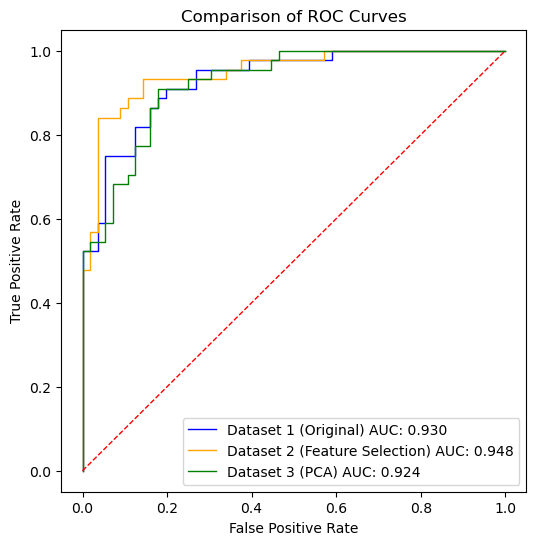

In [18]:
plt.figure(figsize=(6,6))
plt.plot(fpr1, tpr1, color="blue", lw=1, label="Dataset 1 (Original) AUC: {:.3f}".format(roc_auc1))
plt.plot(fpr2, tpr2, color="orange", lw=1, label="Dataset 2 (Feature Selection) AUC: {:.3f}".format(roc_auc2))
plt.plot(fpr3, tpr3, color="green", lw=1, label="Dataset 3 (PCA) AUC: {:.3f}".format(roc_auc3))
plt.plot([0,1], [0,1], color = "red", linestyle = "--", lw = 1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Comparison of ROC Curves")
plt.legend(loc="lower right")
plt.savefig('svm.png')